In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm, trange
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

from net import Network
from engine import Variable, get_gradients

In [2]:
dataset = MNIST(root='.', download=True)
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train

In [3]:
len(dataset)

60000

In [4]:
dataset[0][0]

In [5]:
dataset[0][1]

5

In [6]:
np.array(dataset[0][0]).flatten().shape

(784,)

In [7]:
nn = Network(dim=(784,100,10))

In [8]:
epoch = 3
alpha = 0.1
batch_size = 32


In [9]:
indices = np.arange(len(dataset))


In [10]:
Js = []
for e in range(epoch):
    step = 0
    np.random.shuffle(indices)
    for i in trange(0, len(dataset), batch_size):
        batch_indices = indices[i:i+batch_size]
        J = Variable(0)
        for j in range(len(batch_indices)):
            x, y_true = dataset[j]
            x = np.array(ToTensor()(x)).flatten()
            x = [Variable(a) for a in x]

            output = nn(x)
            J += -output[y_true].ln()
        J /= Variable(len(batch_indices))
        Js.append(J.value)
        print(f'Epoch = {e}, Step = {step}, J = {J.value}')
        gradients = get_gradients(J)
        # update weights
        for layer_params in nn.parameters():
            for neuron_params in layer_params:
                for weight in neuron_params:
                    weight.value -= alpha * gradients[weight]
        step += 1


  0%|                                                                      | 0/1875 [00:00<?, ?it/s]

Epoch = 0, Step = 0, J = 23.808246873176984


  0%|                                                           | 1/1875 [01:01<31:55:32, 61.33s/it]

Epoch = 0, Step = 1, J = 15.022882650581783


  0%|                                                           | 2/1875 [02:08<33:33:09, 64.49s/it]

Epoch = 0, Step = 2, J = 8.955419836934668


  0%|                                                           | 3/1875 [03:08<32:36:28, 62.71s/it]

Epoch = 0, Step = 3, J = 4.605395913487546


  0%|▏                                                          | 4/1875 [04:17<33:47:36, 65.02s/it]

Epoch = 0, Step = 4, J = 1.983293013029725


  0%|▏                                                          | 5/1875 [05:18<33:01:20, 63.57s/it]

Epoch = 0, Step = 5, J = 1.743167658061768


  0%|▏                                                          | 6/1875 [06:24<33:28:14, 64.47s/it]

Epoch = 0, Step = 6, J = 1.3941466601566328


  0%|▏                                                          | 7/1875 [07:31<33:56:14, 65.40s/it]

Epoch = 0, Step = 7, J = 1.240263116532387


  0%|▎                                                          | 8/1875 [08:49<34:18:09, 66.14s/it]


KeyboardInterrupt: 

In [11]:
for i in range(10):
    x, y_true = dataset[i]
    
    x = np.array(ToTensor()(x)).flatten()
    x = [Variable(a) for a in x]

    output = nn(x)
#     print(output)
    print('actual', y_true, 'predicted', np.argmax([a.value for a in output]))
    

actual 5 predicted 0
actual 0 predicted 0
actual 4 predicted 4
actual 1 predicted 1
actual 9 predicted 1
actual 2 predicted 2
actual 1 predicted 1
actual 3 predicted 0
actual 1 predicted 1
actual 4 predicted 4


In [12]:
test_dataset = MNIST(root='.', download=True, train=False)

In [13]:
len(test_dataset)

10000

In [ ]:
for i in range(10):
    x, y_true = test_dataset[i]
    
    x = np.array(ToTensor()(x)).flatten()
    x = [Variable(a) for a in x]

    output = nn(x)
#     print(output)
    print('actual', y_true, 'predicted', np.argmax([a.value for a in output]))
    

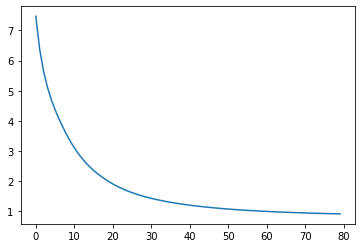

In [16]:
plt.plot(Js)
plt.show()